Matplotlib has a Table class that makes a reasonable simulacrum.

However, it doesn't allow you to highlight the text (meaning no ctrl-c + ctrl-v), the SVG file is a lot busier because it uses `<path>`s to describe the text instead of `<text>`, and I can't figure out how to remove the vertical white lines between cells. 

Still, it's the fastest/easiest option. 

In [1]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
df = df.iloc[:10]

In [3]:
import numpy as np
import matplotlib.pyplot as plt

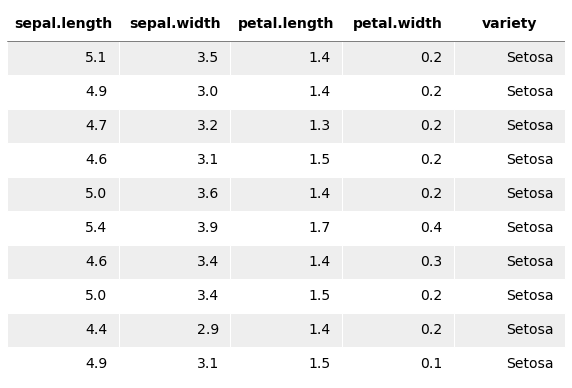

In [5]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14, edges='horizontal',
                     header_color='#fff', row_colors=['w', '#eee'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, 
                         bbox=bbox, 
                         colLabels=data.columns,
                         #edges=edges,
                         **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='black')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(df, header_columns=0, col_width=2.0)

plt.plot([0,1],[1-1/(df.shape[0]+1),1-1/(df.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('svg_matplotlib.svg')

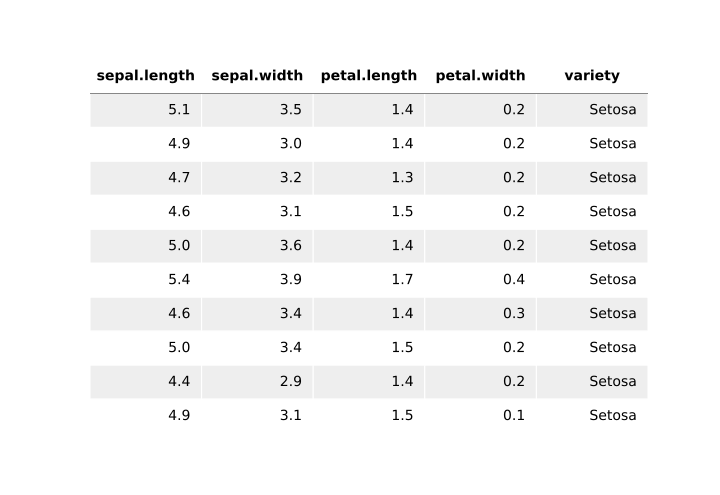

In [6]:
from IPython.display import SVG
s = open('svg_matplotlib.svg').read()
SVG(s)

In [7]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa
